### 98. Validate Binary Search Tree

In [ ]:
class Solution:
    def isValidBST(self, root: Optional[TreeNode]) -> bool:
        def a(node: Optional[TreeNode], mn: int, mx: int) -> bool:
            if not node: 
                return True
            if node.val >= mx or node.val <= mn:
                return False
            return a(node.left, mn, node.val) and a(node.right, node.val, mx)
        return a(root, float(-inf), float(inf))

- The way it works is that we recursively traverse the given tree with the helper function `a`, which gets called with the parameters `mn` and `mx`, which set a boundary for the smallest and largest allowed values of the current `node`.
- When we branch to the left, we set the upper boundary to the value of the current `node`, and when we branch to the right, we set the lower boundary to the value of the current `node`.

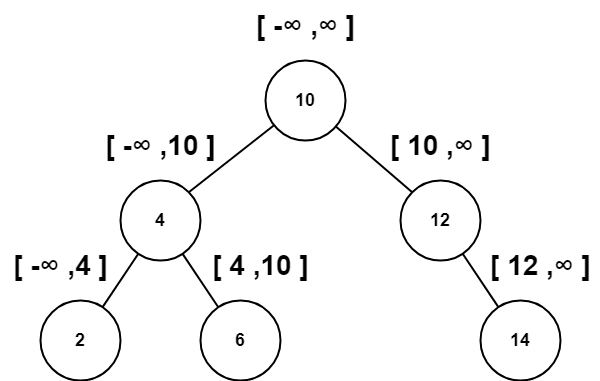

### 100. Same Tree

In [ ]:
class Solution:
    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        res = True
        def a(n1, n2):
            nonlocal res
            if not n1 and n2:
                res = False
                return
            elif not n2 and n1:
                res = False
                return
            elif not n1 and not n2:
                return
            if n1.val != n2.val:
                res = False
            a(n1.left, n2.left)
            a(n1.right, n2.right)
        a(p,q)
        return res

- I slightly modified my recursive function from earlier to traverse the given trees `p` and `q` simultaneously.
- If at any point the values of the current nodes `n1` and `n2` do not match, or one of the nodes exists while the other does not, we return `False`.

### 102. Binary Tree Level Order Traversal

In [ ]:
class Solution:
    def levelOrder(self, root: Optional[TreeNode]) -> List[List[int]]:
        res = []

        def a(node: Optional[TreeNode], d: int):
            if not node:
                return
            if d > len(res)-1:
                res.append([])
            res[d].append(node.val)
            a(node.left, d+1)
            a(node.right, d+1)
        a(root, 0)

        return res

- This runs a lot faster than my previous solution because this time around we dynamically increase the length of the result list `res` with increasing depth `d`.

### 104. Maximum Depth of Binary Tree

In [ ]:
class Solution:
    def maxDepth(self, root: Optional[TreeNode]) -> int:
        m = 0
        def a(node, d):
            nonlocal m
            if d > m:
                m = d
            if not node:
                return 
            a(node.left, d+1)
            a(node.right, d+1)
        a(root, 0)
        return m

- I did a recursive tree traversal for the given tree, keeping track of the depth with the variable `d`.
- I also kept track of the largest depth via the variable `m`, which I had to specify as `nonlocal` in order to use it in my recursive calls.

### 105. Construct Binary Tree from Preorder and Inorder Traversal


In [ ]:
class Solution:
    def buildTree(self, preorder: List[int], inorder: List[int]) -> Optional[TreeNode]:
        if not preorder or not inorder:
            return None
        
        # the first elem in preorder is always the root of that subtree
        root = TreeNode(preorder[0])
        # the index of the root in the inorder list
        i = inorder.index(root.val)
        # recursive call with the elements to the left of root
        root.left = self.buildTree(preorder[1:i+1], inorder[:i])
        # recursive call with the elements to the right of root
        root.right = self.buildTree(preorder[i+1:], inorder[i+1:])
        return root

- The way it works is that we build up the tree recursively by calling `buildTree` with the `preorder` traversal and the `inorder` traversal of the left and right subtrees of the current node `root`.
- This works because we know that `root` will always be the first element in the `preorder` traversal.

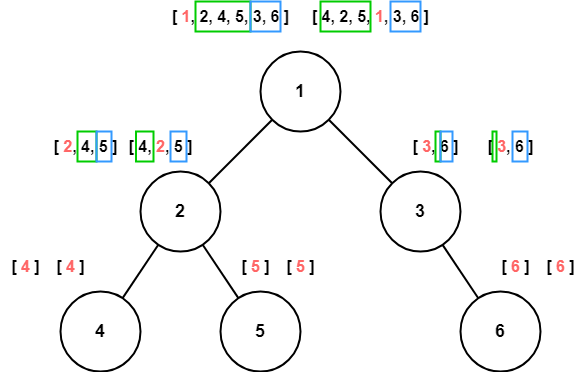

### 110. Balanced Binary Tree

In [ ]:
class Solution:
    def isBalanced(self, root: Optional[TreeNode]) -> bool:
        def subBal(root: Optional[TreeNode]) -> bool:
            if not root:
                return True
            m = 0
            def a(node, d):
                nonlocal m
                if d > m:
                    m = d
                if not node:
                    return
                a(node.left, d+1)
                a(node.right, d+1)
            a(root.left, 0)
            mL = m
            m = 0
            a(root.right, 0)
            mR = m
            return abs(mR-mL) <= 1

        res = True
        def a(node):
            nonlocal res
            if not node:
                return
            if not subBal(node):
                res = False
            a(node.left)
            a(node.right)
        a(root)
        return res

- Initially, I had tried to submit my helper function `subBal` as a solution to this problem, but after reading the definition for a **height-balanced tree**  again, I realized that I had to ensure this quality not only for the given tree but for every one of its subtrees as well.
- The function `subBal` returns `True` when the maximum depth of the left and right subtrees of the given tree differ by 1 at most, and it returns `False`, otherwise.
- We recursively traverse the given tree and return `True` if `subBal` returns `True` on every node, and we return `False`, otherwise.
- The runtime complexity of this solution is quite suboptimal, and I am sure there is a better way to do it.

### 124. Binary Tree Maximum Path Sum

In [ ]:
class Solution:
    def maxPathSum(self, root: Optional[TreeNode]) -> int:
        mSum = -1001
        def a(node):
            if not node:
                return 0
            nonlocal mSum
            lsum = a(node.left)
            rsum = a(node.right)
            sums = [node.val, node.val + lsum, node.val + rsum, node.val + lsum + rsum] # all possible sums for the current node
            currentMaxSum = max(sums) # the largest of all possible sums for the current node
            mSum = max(mSum, currentMaxSum) # check if the current max sum is greater than our largest sum so far
            return max(sums[:-1]) # return the largest possible sum for our current node excluding the last sum of sums because this would not be a path anymore
        a(root)
        return mSum

- This problem is extremely similar to the problem *543. Diameter of Binary Tree* so the solution will follow the same approach.
- How it works is that we traverse the given tree and do two things in every iteration.
- The first thing that we do is to recursively retrieve the largest possible sums in the left and right subtrees, `lsum` and `rsum`. We will then figure out the largest possible sum between the current `node` and the two sums that we have retrieved. If this sum, `currentMaxSum`, is larger than the greatest sum we have encountered so far, `mSum`, we update the value of `mSum`.
- The second thing we do is return the largest possible sum between `node`, `lsum`, and `rsum` that still maintains the structure of a path, which is important because we are recursively constructing a path.

### 199. Binary Tree Right Side View

In [ ]:
class Solution:
    def rightSideView(self, root: Optional[TreeNode]) -> List[int]:
        res = []

        def a(node: Optional[TreeNode], d: int):
            if not node:
                return
            if d > len(res)-1:
                res.append([])
            res[d].append(node.val)
            a(node.left, d+1)
            a(node.right, d+1)
        a(root, 0)

        return [l[-1] for l in res]

- I have pretty much copied and pasted my improved solution for the previous problem. 

### 226. Invert Binary Tree

In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def invertTree(self, root: Optional[TreeNode]) -> Optional[TreeNode]:
        def a(node):
            if not node:
                return
            l = node.left
            node.left = node.right
            node.right = l
            a(node.left)
            a(node.right)
        a(root)
        return root

- I traversed the given tree recursively and swapped the left and right child nodes of the current `node`.

### 230. Kth Smallest Element in a BST

In [ ]:
class Solution:
    def kthSmallest(self, root: Optional[TreeNode], k: int) -> int:
        vals = []
        def a(node: Optional[TreeNode]):
            if not node:
                return
            nonlocal vals
            vals.append(node.val)
            a(node.left)
            a(node.right)
        a(root)
        s_vals = list(sorted(vals))
        return s_vals[k-1]

- This was quite easy, and I am not sure why it has a medium difficulty rating.
- The way it works is that we iterate over the given tree and save the value of every `node` inside of the list `vals`.
- Lastly, we sort `vals` and save the result in `s_vals`. The element at index `k-1` will be the Kth smallest element.

### 235. Lowest Common Ancestor of a Binary Search Tree

In [ ]:
class Solution:
    def lowestCommonAncestor(self, root: 'TreeNode', p: 'TreeNode', q: 'TreeNode') -> 'TreeNode':
        def inSubtrees(haystack: 'TreeNode', needle: 'TreeNode') -> bool:
            res = False
            def a(node: 'TreeNode'):
                nonlocal res
                nonlocal haystack
                if not node:
                    return
                if not node is haystack and node is needle:
                    res = True
                a(node.left)
                a(node.right)
            a(haystack)
            return res
        
        # traverse until either p or q found
        # if one found and the other in it's subtree return the found node
        # else go up one layer and search again, if found return this node 
        # repeat step 3 
        
        end = False
        found = None
        lcas = []
        res = root
        def a(node: 'TreeNode'):
            if not node:
                return
            nonlocal found, res, lcas, end
            if not found:
                lcas.append(node)

            if found and not end:
                #print(f'searching subtrees of {lcas[-1].val} for {p.val if found == q else q.val}')
                if inSubtrees(lcas[-1], p if found is q else q):
                    #print(f'found it. res -> {lcas[-1].val}')
                    res = lcas[-1]
                    return
                if lcas:
                    lcas.pop()
                    #print(f'didnt find it lcas = {[v.val for v in lcas]}')

            if (node is p or node is q) and not found:
                #print(f'found the first node: {node.val}')
                found = node
                if inSubtrees(found, p if found is q else q):
                    res = found
                    end = True
                lcas.pop()
                return
            a(node.left)
            a(node.right)

        a(root)
        return res

- This problem felt a bit more complicated than the other tree-related problems so far.
- The way I have approached this problem is to search the tree until I find either `p` or `q`, and when I do find one of them, I check whether its subtrees contain the other node.
- If one of the subtrees does contain the other node, the `found` node will be our solution.
- Otherwise, we keep searching the subtrees of the parent node until we find the parent node, whose subtrees contain the other node.

### 297. Serialize and Deserialize Binary Tree

In [ ]:
class Codec:
    def serialize(self, root):
        po = []
        def preorder(node):
            nonlocal po
            if not node:
                po.append('x')
                return
            po.append(node.val)
            preorder(node.left)
            preorder(node.right)
        preorder(root)
        return str(po)

    def deserialize(self, data):
        po = eval(data)
        def preorder():
            nonlocal po
            if po[0] == 'x':
                po = po[1:]
                return None
            node = TreeNode(po[0], None, None)
            po = po[1:]
            node.left = preorder()
            node.right = preorder()
            return node

        root = preorder()
        return root

        
# Your Codec object will be instantiated and called as such:
# ser = Codec()
# deser = Codec()
# ans = deser.deserialize(ser.serialize(root))

- At first, I tried to copy the approach from the previous problem and apply it to this one as well.
- Then I realized that the solution to the previous problem depended on the values of the tree being unique, which was not the case here.
- I slightly altered my approach by using a `preorder` traversal for serializing the tree and then deserializing it in the same manner.
- The slight difference is that I also had to add an identifier for when we reached an empty node, for which I chose to use `'x'`.

### 543. Diameter of Binary Tree

In [ ]:
class Solution:
    def diameterOfBinaryTree(self, root: Optional[TreeNode]) -> int:
        mDiam = 0
        def a(node):
            if not node:
                return 0
            nonlocal mDiam
            ldepth = a(node.left)
            rdepth = a(node.right)
            diam = ldepth + rdepth # check if the current diameter d is greater than max diameter
            if diam > mDiam:
                mDiam = diam
            return 1 + max(ldepth, rdepth) # return the longer of the two paths to the left and to the right + 1 for current node
        a(root)
        return mDiam

- This was a solution that I came up with after looking through the solutions tab, but I find it to be somewhat unintuitive.
- How it works is that we traverse the given tree, and on every iteration we do two things. 
- The first thing we do is calculate the current diameter, `diam`, by taking the sum of the depths of the longest paths to the left and to the right, `ldepth` and `rdepth`, and updating our maximum diameter, `mDiam`.
- The second thing we do is return the length of the longer of the two paths to our left and to our right plus 1 for the current node.

### 572. Subtree of Another Tree

In [ ]:
class Solution:
    def isSameTree(self, p: Optional[TreeNode], q: Optional[TreeNode]) -> bool:
        res = True
        def a(n1, n2):
            nonlocal res
            if not n1 and n2:
                res = False
                return
            elif not n2 and n1:
                res = False
                return
            elif not n1 and not n2:
                return
            if n1.val != n2.val:
                res = False
            a(n1.left, n2.left)
            a(n1.right, n2.right)
        a(p,q)
        return res
    def isSubtree(self, root: Optional[TreeNode], subRoot: Optional[TreeNode]) -> bool: 
        res = False
        def a(node: Optional[TreeNode], subRoot: Optional[TreeNode]):
            nonlocal res
            if not node:
                return
            if node.val == subRoot.val and not res:
                res = self.isSameTree(node, subRoot)
            a(node.left, subRoot)
            a(node.right, subRoot)

        a(root, subRoot)
        return res

- The way it works is that we do a recursive tree traversal of the given tree, and whenever the value of the current `node` is equal to the value of `subRoot`, we use the function that we have defined in our previous solution to check whether the current tree is equal to the given subtree.
- If we have found a matching subtree, we return `True` and don't perform this check on any other nodes.

### 1448. Count Good Nodes in Binary Tree

In [ ]:
class Solution:
    def goodNodes(self, root: TreeNode) -> int:
        s = []
        maxS = [root.val if root else None]
        res = 0

        def a(node: TreeNode):
            if not node:
                return

            nonlocal s, maxS, res
            s.append(node)
            if node.val >= maxS[-1]:
                maxS.append(node.val)
            
            #print(f'current path: {[v.val for v in s]}  current max: {[v for v in maxS]}')

            if node.val >= maxS[-1]:
                #print(f"{node.val} is a good node!")
                res += 1

            a(node.left)
            a(node.right)
            if s and not s[-1] is root:
                n = s.pop()
                if maxS and maxS[-1] == n.val and len(maxS) > 1:
                    maxS.pop()
        a(root)

        return res

- The way I have approached this problem is to recursively iterate over the given tree while keeping track of the path to the current `node` with the help of the stack `s`.
- Furthermore, I have used a second stack, `maxS`, to keep track of the maximum value in the current path that is saved in `s`.
- Whenever the value of the current `node` is greater or equal to the maximum in the path leading up to it, `maxS[-1]`,  we increase the number of good nodes by 1.